In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn
import numpy as np

In [136]:
experiment_names = ["base_capacitated",
                    "base_uncapacitated",
                    "tar_capacitated",
                    "tar_uncapacitated"]
experiment_names_breakdown = ["base_capacitated_breakdown",
                            "base_uncapacitated_breakdown",
                            "tar_capacitated_breakdown",
                            "tar_uncapacitated_breakdown"]
data_dict = {}
data_dict_breakdown = {}
for en in experiment_names:
    data_dict[en] = pd.read_csv("/home/daan/Desktop/%s/sum_uc.csv"%en,index_col='Unnamed: 0').iloc[:,1:-1]
for en in experiment_names_breakdown:
    data_dict_breakdown[en] = pd.read_csv("/home/daan/Desktop/%s/sum_uc.csv"%en,index_col='Unnamed: 0').iloc[:,1:-1]
    
m1=np.zeros([16,4])
m2=np.zeros([16,4])
for i in range(len(experiment_names)):
    name = experiment_names[i]
    data = data_dict[name]
    
    name_breakdown = experiment_names_breakdown[i]
    data_breakdown = data_dict_breakdown[name_breakdown]
    for j in range(16):
        m1[j,i]=data.iloc[j*4,-1]
        m2[j,i]=data_breakdown.iloc[j*4,-1]      

## Spaghettiplot unsatisfied consumption

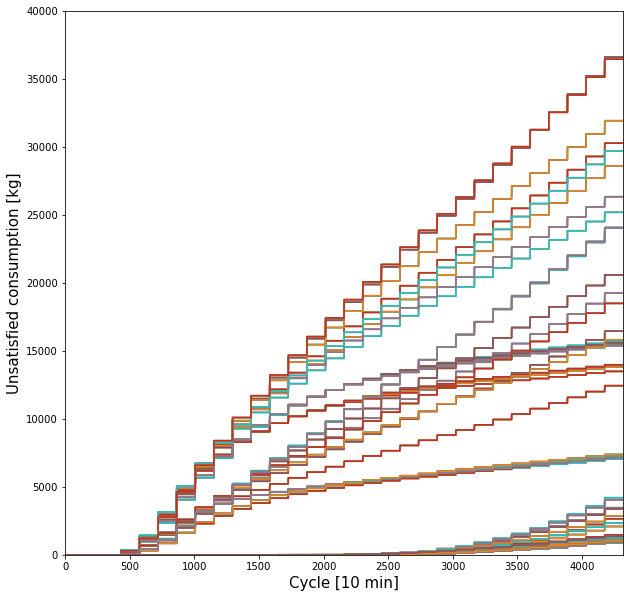

In [137]:
seaborn.set_context( rc={"axes.labelsize":15})
fig,ax = plt.subplots(figsize=(10,10))
runtime = 4318
x=np.linspace(0,runtime-1,4318)
for en in experiment_names:
    for i in range(64):
        seaborn.lineplot(x=x,y=data_dict[en].iloc[:,1:-1].iloc[i])
plt.xlim([0,4318])
plt.ylim([0,0.4e5])
plt.ylabel("Unsatisfied consumption [kg]");
plt.xlabel("Cycle [10 min]");
# plt.title("Regular scenario\nUnsatisfied consumption",fontsize=15);

## Ordered heatmap unsatisfied consumption regular scenario

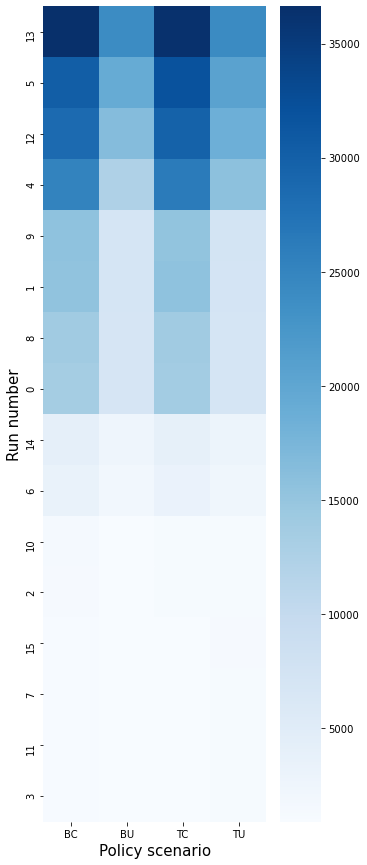

In [138]:
m1_ordered = pd.DataFrame(m1,columns=["BC","BU","TC","TU"]).sort_values("BC").iloc[::-1]
seaborn.set_context( rc={"axes.labelsize":15})
fig,ax = plt.subplots(figsize=(5,15))
seaborn.heatmap(data=m1_ordered,ax=ax,cmap="Blues")#,x=final_gdf_dict['fatm_id'],y=final_gdf_dict['size'],color='blue');
# plt.xticks([0.5,1.5,2.5,3.5],["BC","BU","TC","TU"])
plt.ylabel("Run number");
plt.xlabel("Policy scenario");
# plt.title("Regular scenario\nUnsatisfied consumption",fontsize=15);

## Ordered heatmap unsatisfied consumption breakdown

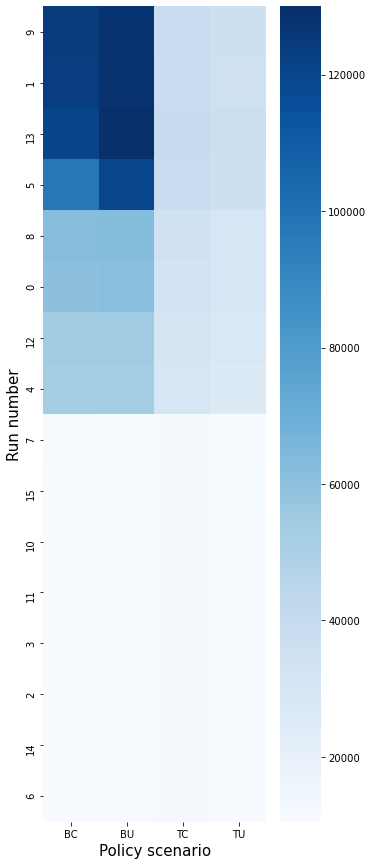

In [139]:
m2_ordered = pd.DataFrame(m2,columns=["BC","BU","TC","TU"]).sort_values("BC").iloc[::-1]
seaborn.set_context( rc={"axes.labelsize":15})
fig,ax = plt.subplots(figsize=(5,15))
seaborn.heatmap(data=m2_ordered,ax=ax,cmap="Blues")#,x=final_gdf_dict['fatm_id'],y=final_gdf_dict['size'],color='blue');
# plt.xticks([0.5,1.5,2.5,3.5],["BC","BU","TC","TU"])
plt.ylabel("Run number");
plt.xlabel("Policy scenario");
# plt.title("Regular scenario\nUnsatisfied consumption",fontsize=15);

In [140]:
m1_worst = m1_ordered.index[0:8]
m2_worst = m2_ordered.index[0:8]

m1_worst_worst = m1_ordered.index[0:4] 
inputs = {}
for en in experiment_names:
    inputs[en] = pd.read_csv("/home/daan/Desktop/%s/input.csv"%en,index_col='Unnamed: 0').iloc[:,1:-1]

In [141]:
m1_worst,m2_worst

(Int64Index([13, 5, 12, 4, 9, 1, 8, 0], dtype='int64'),
 Int64Index([9, 1, 13, 5, 8, 0, 12, 4], dtype='int64'))

In [142]:
m1_ordered[m1_ordered.index.isin(m1_worst)]

,BC,BU,TC,TU
13,36626.496615,24028.020982,36466.352322,24080.643513
5,30285.497181,19268.690009,31943.901508,20600.944488
12,28622.448089,16449.617416,29715.390140,18499.886431
4,25200.822633,12445.882835,26350.416025,15820.519687
9,15694.863845,7149.614822,15383.944232,7383.628443
1,15501.876290,7172.091452,15601.585920,7308.249304
8,13975.485866,7036.685518,13985.565661,7148.426108
0,13494.826366,7045.685518,13815.065661,7169.926108


In [143]:
# seaborn.set_context( rc={"axes.labelsize":15})
# fig,ax = plt.subplots(figsize=(5,15))
# seaborn.heatmap(data=m1,ax=ax,cmap="Blues")#,x=final_gdf_dict['fatm_id'],y=final_gdf_dict['size'],color='blue');
# plt.xticks([0.5,1.5,2.5,3.5],["BC","BU","TC","TU"])
# plt.ylabel("Run number");
# plt.xlabel("Policy scenario");
# # plt.title("Regular scenario\nUnsatisfied consumption",fontsize=15);

In [144]:
# seaborn.set_context( rc={"axes.labelsize":15})
# fig,ax = plt.subplots(figsize=(5,15))
# seaborn.heatmap(data=m2,ax=ax,cmap="Blues")#,x=final_gdf_dict['fatm_id'],y=final_gdf_dict['size'],color='blue');
# plt.xticks([0.5,1.5,2.5,3.5],["BC","BU","TC","TU"])
# plt.ylabel("Run number");
# plt.xlabel("Policy scenario");
# # plt.title("Breakdown scenario\nUnsatisfied consumption",fontsize=15);

In [150]:
experiment_names = ["base_capacitated",
                    "base_uncapacitated",
                    "tar_capacitated",
                    "tar_uncapacitated"]
experiment_names_breakdown = ["base_capacitated_breakdown",
                            "base_uncapacitated_breakdown",
                            "tar_capacitated_breakdown",
                            "tar_uncapacitated_breakdown"]
data_dict = {}
data_dict_breakdown = {}
for en in experiment_names:
    data_dict[en] = pd.read_csv("/home/daan/Desktop/%s/sum_fd.csv"%en,index_col='Unnamed: 0').iloc[:,1:-1]
    input_dict[en] = pd.read_csv("/home/daan/Desktop/%s/input.csv"%en,index_col='Unnamed: 0').iloc[:,1:-1]
for en in experiment_names_breakdown:
    data_dict_breakdown[en] = pd.read_csv("/home/daan/Desktop/%s/sum_fd.csv"%en,index_col='Unnamed: 0').iloc[:,1:-1]
    input_dict[en] = pd.read_csv("/home/daan/Desktop/%s/input.csv"%en,index_col='Unnamed: 0').iloc[:,1:-1]


m1=np.zeros([16,4])
m2=np.zeros([16,4])
for i in range(len(experiment_names)):
    name = experiment_names[i]
    data = data_dict[name]
    
    name_breakdown = experiment_names_breakdown[i]
    data_breakdown = data_dict_breakdown[name_breakdown]
    
    for j in range(16):
        m1[j,i]=data.iloc[j*4,-1]
        m2[j,i]=data_breakdown.iloc[j*4,-1]     


## Spaghettiplot Food degradation regular scenario

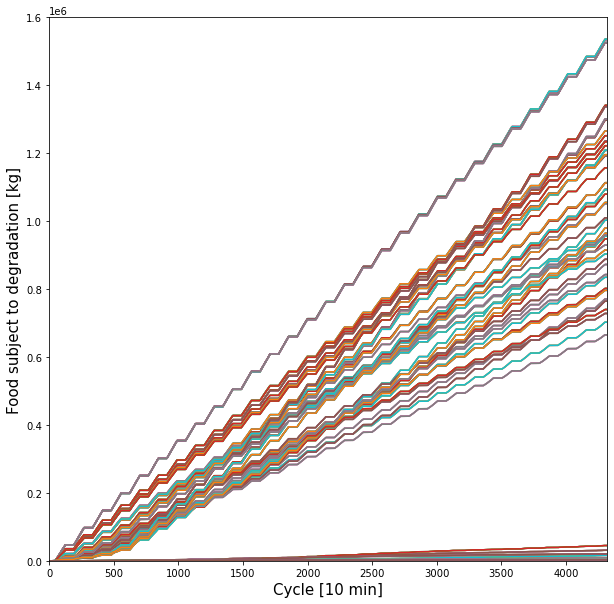

In [151]:
seaborn.set_context( rc={"axes.labelsize":15})
fig,ax = plt.subplots(figsize=(10,10))
runtime = 4318
x=np.linspace(0,runtime-1,4318)
for en in experiment_names:
    for i in range(64):
        seaborn.lineplot(x=x,y=data_dict[en].iloc[:,1:-1].iloc[i])
plt.xlim([0,4318])
plt.ylim([0,1.6e6])
plt.ylabel("Food subject to degradation [kg]");
plt.xlabel("Cycle [10 min]");
# plt.title("Regular scenario\nUnsatisfied consumption",fontsize=15);

## Ordered heatmap food degradation regular scenario

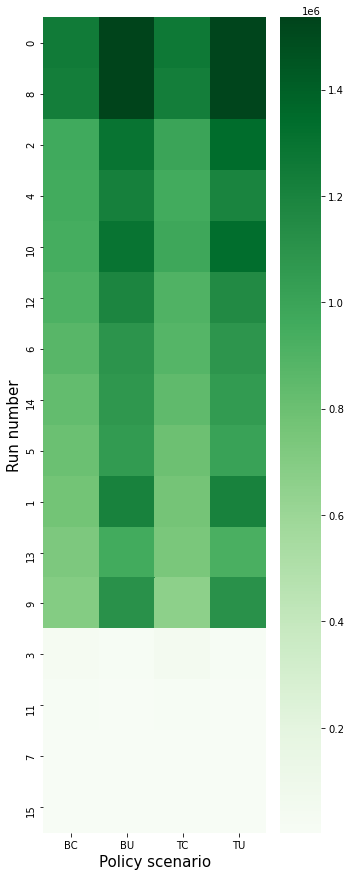

In [152]:
m1_ordered = pd.DataFrame(m1,columns=["BC","BU","TC","TU"]).sort_values("BC").iloc[::-1]
seaborn.set_context( rc={"axes.labelsize":15})
fig,ax = plt.subplots(figsize=(5,15))
seaborn.heatmap(data=m1_ordered,ax=ax,cmap="Greens")#,x=final_gdf_dict['fatm_id'],y=final_gdf_dict['size'],color='blue');
plt.xticks([0.5,1.5,2.5,3.5],["BC","BU","TC","TU"])
plt.ylabel("Run number");
plt.xlabel("Policy scenario");
# plt.title("Regular scenario\nFood degradation",fontsize=15);

## Ordered heatmap food degradation breakdown scenario

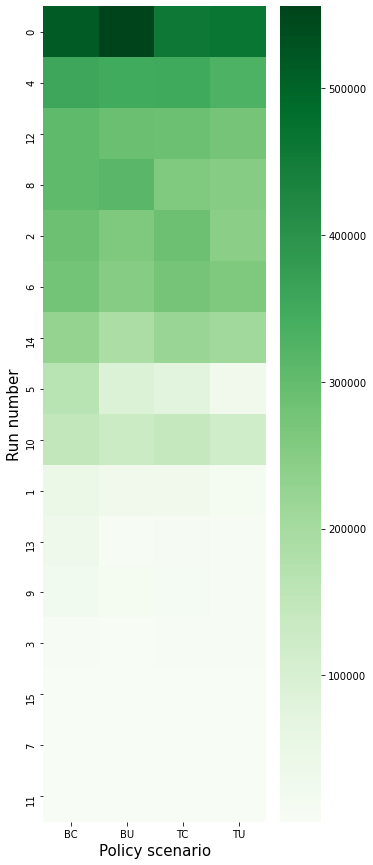

In [153]:
m2_ordered = pd.DataFrame(m2,columns=["BC","BU","TC","TU"]).sort_values("BC").iloc[::-1]
seaborn.set_context( rc={"axes.labelsize":15})
fig,ax = plt.subplots(figsize=(5,15))
seaborn.heatmap(data=m2_ordered,ax=ax,cmap="Greens")#,x=final_gdf_dict['fatm_id'],y=final_gdf_dict['size'],color='blue');
plt.xticks([0.5,1.5,2.5,3.5],["BC","BU","TC","TU"])
plt.ylabel("Run number");
plt.xlabel("Policy scenario");
# plt.title("Breakdown scenario\nFood degradation",fontsize=15);

## df

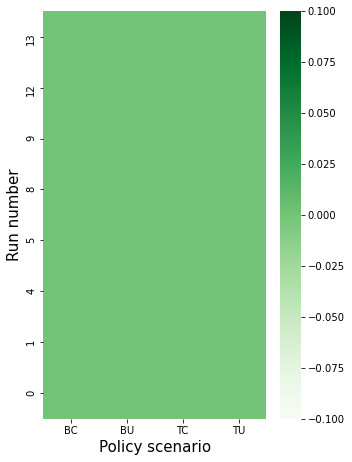

In [149]:
m1_f = m1_ordered[m1_ordered.index.isin(m1_worst)]
seaborn.set_context( rc={"axes.labelsize":15})
fig,ax = plt.subplots(figsize=(5,7.5))
seaborn.heatmap(data=m1_f,ax=ax,cmap="Greens")#,x=final_gdf_dict['fatm_id'],y=final_gdf_dict['size'],color='blue');
plt.xticks([0.5,1.5,2.5,3.5],["BC","BU","TC","TU"])
plt.ylabel("Run number");
plt.xlabel("Policy scenario");
# plt.title("Regular scenario\nFood degradation",fontsize=15);

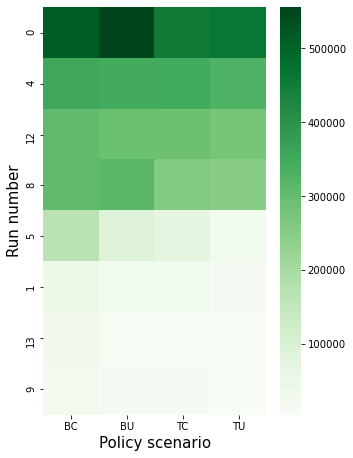

In [83]:
m2_f = m2_ordered[m2_ordered.index.isin(m2_worst)]
seaborn.set_context( rc={"axes.labelsize":15})
fig,ax = plt.subplots(figsize=(5,7.5))
seaborn.heatmap(data=m2_f,ax=ax,cmap="Greens")#,x=final_gdf_dict['fatm_id'],y=final_gdf_dict['size'],color='blue');
plt.xticks([0.5,1.5,2.5,3.5],["BC","BU","TC","TU"])
plt.ylabel("Run number");
plt.xlabel("Policy scenario");
# plt.title("Regular scenario\nFood degradation",fontsize=15);

In [134]:
inputs = pd.read_csv("/home/daan/Desktop/base_capacitated/input.csv",index_col='Unnamed: 0').iloc[:,1:-1]
inputs = inputs[inputs.index%4==1].reset_index().iloc[:,1:]
inputs2 = inputs[inputs.index.isin(m2_worst)]

In [135]:
inputs

,V2,V3,V4,V5
0,0,0,3,0
1,0,0,3,1
2,0,0,14,0
3,0,0,14,1
4,0,1,3,0
5,0,1,3,1
6,0,1,14,0
7,0,1,14,1
8,1,0,3,0
9,1,0,3,1


In [128]:
m1_ordered

,BC,BU,TC,TU
0,1.251176e+06,1.533944e+06,1.265072e+06,469544.000000
8,1.235417e+06,1.535752e+06,1.233564e+06,244295.817735
2,9.641760e+05,1.296968e+06,1.002392e+06,248736.000000
4,9.557048e+05,1.221739e+06,9.585470e+05,341832.587883
10,9.476599e+05,1.300700e+06,9.794564e+05,125696.881498
12,9.147288e+05,1.191705e+06,9.032299e+05,283373.616051
6,8.721427e+05,1.093720e+06,8.874171e+05,263111.384693
14,8.345005e+05,1.079094e+06,8.424664e+05,189644.681348
5,8.016851e+05,1.051309e+06,7.960573e+05,19013.395412
1,7.705280e+05,1.208024e+06,7.640560e+05,16776.000000


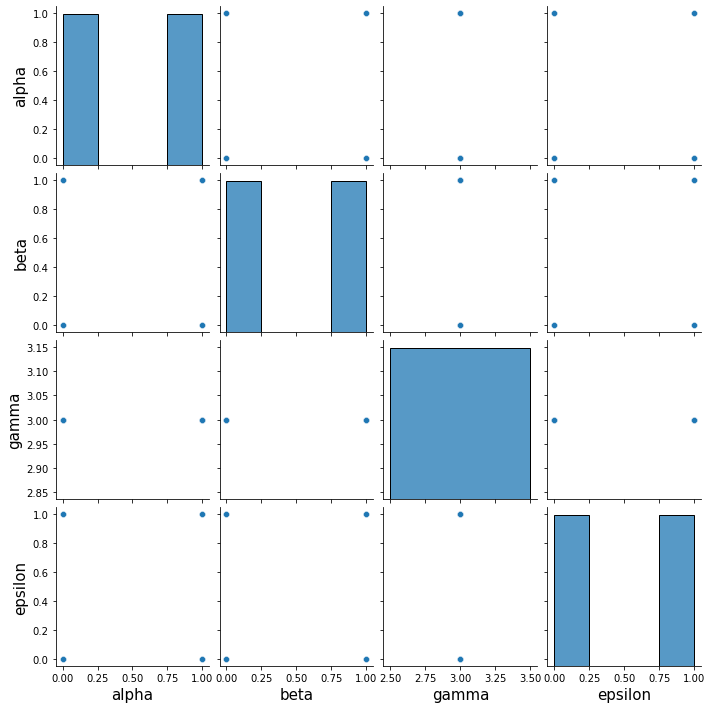

In [126]:
import seaborn
inputs.columns = ["alpha","beta","gamma","epsilon"]
seaborn.set_context( rc={"axes.labelsize":15})
pp = seaborn.pairplot(inputs)#raw_results.iloc[:,1:])
# pp.fig.suptitle("Pairplot: nfe10000_10_NSGAII_NC",y=1.03,size=25);

In [127]:
inputs

,alpha,beta,gamma,epsilon
0,0,0,3,0
1,0,0,3,1
4,0,1,3,0
5,0,1,3,1
8,1,0,3,0
9,1,0,3,1
12,1,1,3,0
13,1,1,3,1


In [132]:
data_dict['tar_uncapacitated'].iloc[:,-1]

1     469544.000000
2     469544.000000
3     469544.000000
4     469544.000000
5      16776.000000
          ...      
60    189644.681348
61       245.637057
62       245.637057
63       245.637057
64       245.637057
Name: V4321, Length: 64, dtype: float64